In [1]:
# import libraries
import numpy as np                   
import pandas as pd                  
import seaborn as sns     
import matplotlib.pyplot as plt                       


In [4]:
# import the classification dataset
df = pd.read_csv('./DATA/cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [8]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [9]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

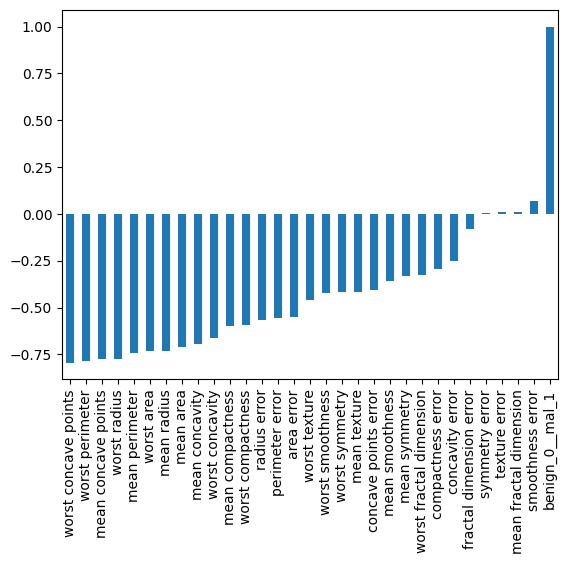

In [12]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

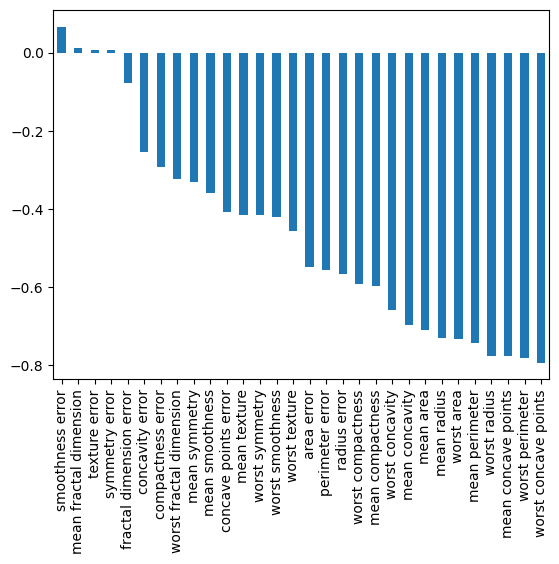

In [22]:
df.corr()['benign_0__mal_1'][:-1].sort_values(ascending=False).plot(kind='bar')

<Axes: >

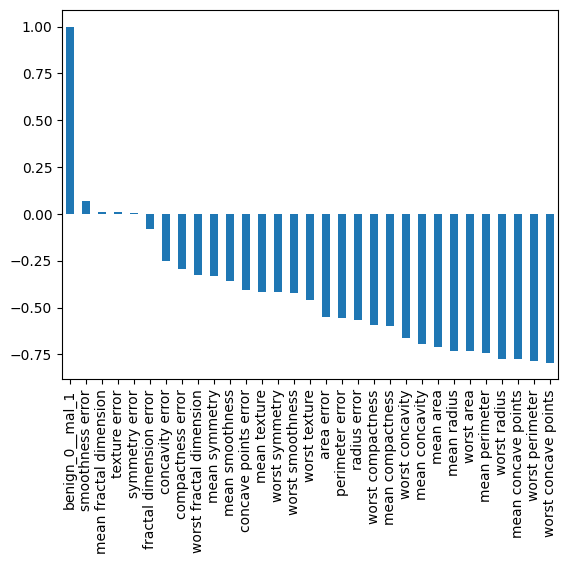

In [ ]:
# us a single column to describe how correlated one feature is to rest of the feastures
df.corr()['benign_0__mal_1'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

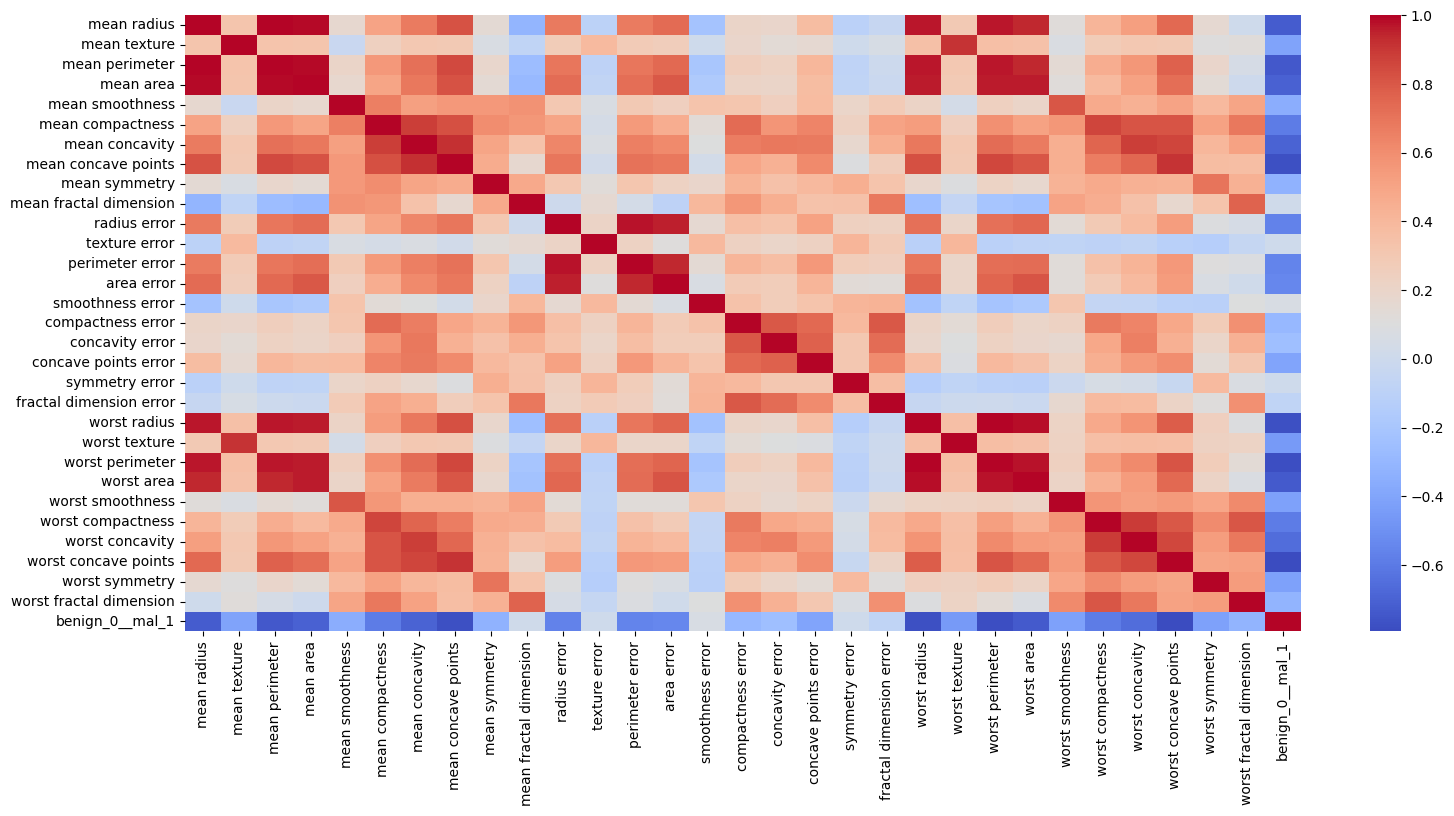

In [30]:
plt.figure(figsize=(18,8))
ht = df.corr()
sns.heatmap(ht, cmap='coolwarm')

In [31]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [33]:
# define X and y variables
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
import tensorflow as tf       
from tensorflow.keras.models import Sequential    
from tensorflow.keras.layers import Dense, Dropout


In [40]:
X_train.shape

(455, 30)

In [41]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))

# Binary classification
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [45]:
model.fit(x=X_train, y=y_train, epochs=250, 
          validation_data=(X_test, y_test))

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0797 - val_loss: 0.0826
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0979 - val_loss: 0.0788
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0884 - val_loss: 0.0781
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0796 - val_loss: 0.0812
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0675 - val_loss: 0.0754
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0838 - val_loss: 0.0747
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0661 - val_loss: 0.0798
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0608 - val_loss: 0.0738
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0642 - val_loss: 0.0730
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0778 - val_loss: 0.0705
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0590 - val_loss: 0.0707
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0

In [46]:
model.history.history

{'loss': [0.0896001011133194,
  0.0870358794927597,
  0.08883726596832275,
  0.08255450427532196,
  0.08583758026361465,
  0.07966700941324234,
  0.0810517817735672,
  0.07557850331068039,
  0.07208213210105896,
  0.0713542029261589,
  0.06837137788534164,
  0.06887076795101166,
  0.06656704843044281,
  0.07159534841775894,
  0.07178616523742676,
  0.06509348005056381,
  0.0606677308678627,
  0.060469504445791245,
  0.061202771961688995,
  0.05970395356416702,
  0.05790122598409653,
  0.05759752169251442,
  0.057730142027139664,
  0.06360418349504471,
  0.054035063832998276,
  0.059623684734106064,
  0.05288532003760338,
  0.053608931601047516,
  0.0517263300716877,
  0.05200362578034401,
  0.052021969109773636,
  0.050237417221069336,
  0.051111381500959396,
  0.05237777158617973,
  0.04855788126587868,
  0.05057559907436371,
  0.05022628232836723,
  0.05097021907567978,
  0.04796190187335014,
  0.04503651708364487,
  0.05231459066271782,
  0.05978286266326904,
  0.05132417753338814,


<Axes: >

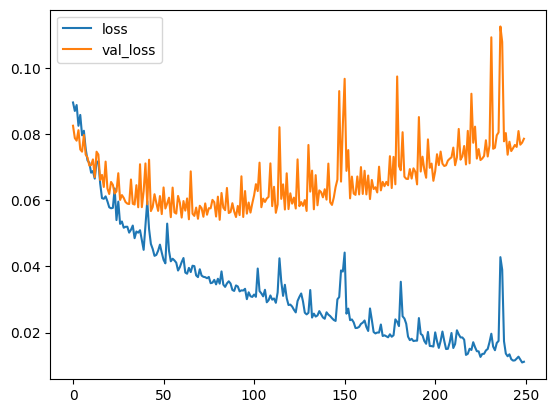

In [49]:
lozz = pd.DataFrame(model.history.history)
lozz.plot(kind='line')

In [54]:
# Early stops
from tensorflow.keras.callbacks import EarlyStopping

early_stops = EarlyStopping(monitor='val_loss',
                            mode='min',
                            verbose=1,
                            patience=25)

In [55]:
model1 = Sequential()
model1.add(Dense(30, activation='relu'))
model1.add(Dense(30, activation='relu'))

# Binary classification
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [56]:
model1.fit(x=X_train, y=y_train, epochs=250, 
          validation_data=(X_test, y_test),
          callbacks=[early_stops])

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7059 - val_loss: 0.6703
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6699 - val_loss: 0.6212
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6181 - val_loss: 0.5704
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5747 - val_loss: 0.5120
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5136 - val_loss: 0.4472
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4707 - val_loss: 0.3848
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3931 - val_loss: 0.3267
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3378 - val_loss: 0.2797
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2912 - val_loss: 0.2423
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2572 - val_loss: 0.2151
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2569 - val_loss: 0.1950
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

<Axes: >

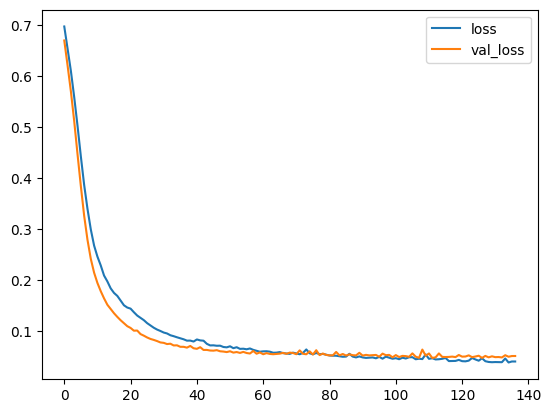

In [57]:
losses = pd.DataFrame(model1.history.history)
losses.plot(kind='line')

In [58]:
model2 = Sequential()

model2.add(Dense(30, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(30, activation='relu'))
model2.add(Dropout(0.5))
# Binary classification
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam')

In [59]:
model2.fit(x=X_train, y=y_train, epochs=250, 
          validation_data=(X_test, y_test),
          callbacks=[early_stops])

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.7283 - val_loss: 0.6910
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6980 - val_loss: 0.6673
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6744 - val_loss: 0.6387
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6418 - val_loss: 0.6075
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6273 - val_loss: 0.5737
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5823 - val_loss: 0.5320
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5625 - val_loss: 0.4902
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5348 - val_loss: 0.4498
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5208 - val_loss: 0.4160
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5237 - val_loss: 0.3851
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4651 - val_loss: 0.3544
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - los

<Axes: >

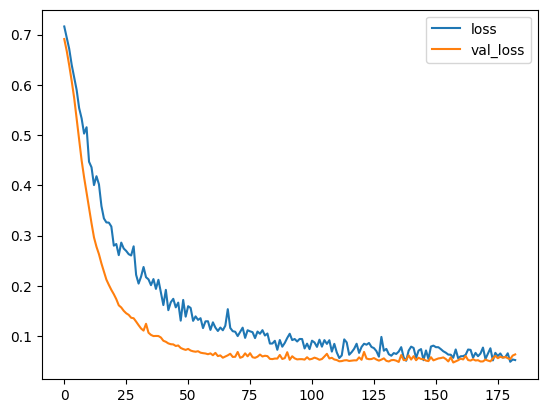

In [61]:
model_losses = pd.DataFrame(model2.history.history)
model_losses.plot(kind='line')

In [69]:

# predictions = model2.predict_classes(X_test)
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [70]:
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [71]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predicted_classes))

[[43  0]
 [71  0]]
